In [2]:
# data from: https://www.kaggle.com/datasets/bahadoreizadkhah/face-mask-types-dataset/code
# reference: https://www.kaggle.com/code/umarmasud/facemask-detection-inceptionv3

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import models
from sklearn.metrics import classification_report, confusion_matrix
import pathlib

In [3]:
data_train = pathlib.Path('./Dataset/train')
data_test = pathlib.Path('./Dataset/test')

INPUT_SIZE = [300, 300]
BATCH = 6

In [4]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.0,
    rescale=1./255
)

training_data = training_datagen.flow_from_directory('./Dataset/train',
                                                     subset="training",
                                                     shuffle=True,
                                                     target_size=INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     color_mode="rgb",
                                                     class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('./Dataset/test',
                                             target_size=INPUT_SIZE,
                                             color_mode="rgb",
                                             batch_size=BATCH,
                                             class_mode='categorical',
                                             shuffle=False)

# display dimensions
x_test, y_test = next(test_data)
x_train, y_train = next(training_data)

Found 1956 images belonging to 5 classes.
Found 330 images belonging to 5 classes.


In [1]:
inceptionv3_model = tf.keras.applications.InceptionV3(input_shape=(300, 300,3), include_top=False, weights='imagenet')
inceptionv3_model.trainable = True

fine_tune_at = 100
for layer in inceptionv3_model.layers[:fine_tune_at]:
    layer.trainable =  False

inceptionv3_model.summary()

NameError: name 'tf' is not defined

In [23]:
model = models.Sequential([# Lambda(lambda x: x, input_shape=(300, 300, 3)), 
    tf.keras.layers.InputLayer((300, 300, 3)),
    inceptionv3_model,
    GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(5, activation='softmax')])

In [24]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#  optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)

history = model.fit(
    training_data,
    validation_data=test_data,
    epochs=5,
    # batch_size=BATCH,
    # steps_per_epoch=len(training_data),
    # validation_steps=len(test_data)
)

Epoch 1/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 196s 568ms/step - accuracy: 0.5609 - loss: 1.1593 - val_accuracy: 0.4697 - val_loss: 5.8432
Epoch 2/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 533ms/step - accuracy: 0.7796 - loss: 0.6311 - val_accuracy: 0.8303 - val_loss: 0.8201
Epoch 3/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 171s 523ms/step - accuracy: 0.8246 - loss: 0.5311 - val_accuracy: 0.7152 - val_loss: 0.9631
Epoch 4/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 166s 509ms/step - accuracy: 0.8748 - loss: 0.3687 - val_accuracy: 0.7697 - val_loss: 0.8348
Epoch 5/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 157s 480ms/step - accuracy: 0.8957 - loss: 0.3376 - val_accuracy: 0.9364 - val_loss: 0.1900


In [25]:
#Creacion de la matriz de confusion
y_pred=model.predict(test_data, batch_size=BATCH)
print(y_pred.shape)

y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

cm=confusion_matrix(test_data.classes, y_pred)
print(cm)

#Impresion de la exactitud
accu = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accu =accu.diagonal()
print(accu)

#Reporte de metricas
# target_names = ['cloth', 'n95', 'n95v', 'nfm', 'srg']
# print(classification_report(test_data.classes, y_pred, target_names=target_names, digits=4))

# loss, accuracy, specificity, precision, recall = model.evaluate(test_data, verbose=0)
loss, accuracy = model.evaluate(test_data, verbose=0)
print(loss, accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step
(330, 5)
[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 0 0 1 0
 0 2 0 0 0 0 1 0 0 0 2 0 1 0 0 1 1 0 0 1 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[[66  6  3  1  2]
 [ 0 49  1  0  0]
 [ 0  1 47  1  0]
 [ 0  2  0 76  0]
 [ 0  4  0  0 71]]
[0.84615385 0.98       0.95918367 0.97435897 0.94666667]
              precision    recall  f1-score   support

       cloth     1.0000    0.8462    0.9167        78
         n95     0.790

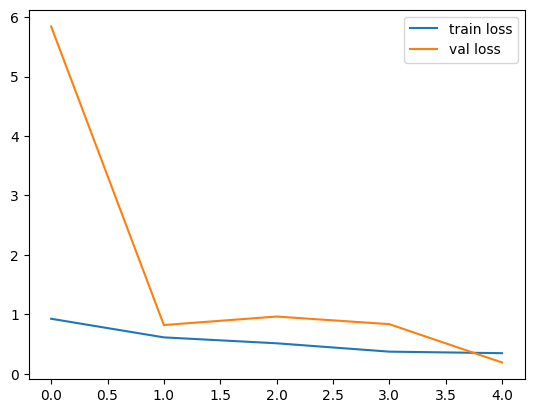

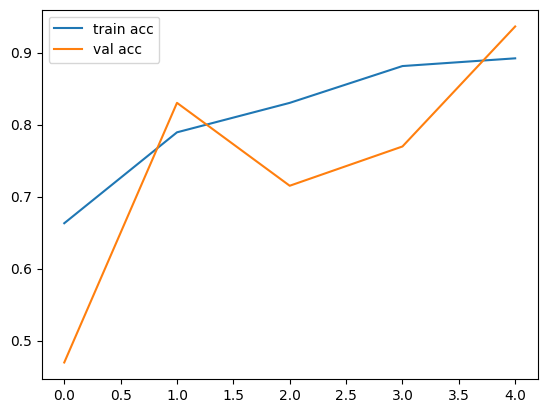

In [26]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')
import numpy as np

In [27]:
test_image = tf.keras.preprocessing.image.load_img(
    './Dataset/test/n95v/1.jpg',
    target_size=INPUT_SIZE)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
i = np.argmax(result[0])
classes = training_data.class_indices.keys()
print(classes)
list(classes)[i]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
dict_keys(['cloth', 'n95', 'n95v', 'nfm', 'srg'])


'n95v'

In [ ]:
def plot_image(j, predictions_array, true_label, img):
    true_label, img = true_label[j], img[j]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                         100*np.max(predictions_array),
                                         classes[np.argmax(true_label)]),
               color=color)

def plot_value_array(k, predictions_array, true_label):
    true_label = true_label[k]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

i = 1
print(classes)
print(classes[i])

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, result, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, result[0], y_test)
plt.show()